# GLBL 5010 - Homework Assignment 1: Examining Convergence

This notebook:
- loads the dataset provided on Canvas
- constructs annualized GDP per capita growth from 1960-2000
- produces required summary stats and plots

**IMPORTANT**  
This notebook assumes csv file is in the same folder as this ipynb  

In [7]:
# Imports and formatting
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

pd.set_option("display.max_columns", 100)
pd.set_option("display.float_format", "{:.2f}".format)

%matplotlib inline

In [8]:
# Load the csv

df = pd.read_csv("hwk1_convergence.csv", sep="\t") # separator argument added since dilineated by tabs by stata export
df.head()

,code,gdppc1960,gdppc2000,abslatitude,edu1960,region
0,AFG,NaN,NaN,0.37,16.88,Asia
1,AGO,NaN,2228.59,0.14,9.79,Sub-Saharan Africa
2,ALB,NaN,5315.43,NaN,90.20,Europe & Central Asia
3,ARE,NaN,111000.00,0.27,43.78,Middle East & North Africa
4,ARG,3211.93,14332.46,0.38,56.46,Americas


In [9]:
# inspect dataframe and make columns easier to read
df.info()
df.columns

COUNTRY = "code"
REGION = "region"
GDP1960 = "gdppc1960"
GDP2000 = "gdppc2000"
EDU1960 = "edu1960"

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 174 entries, 0 to 173
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   code         174 non-null    object 
 1   gdppc1960    109 non-null    float64
 2   gdppc2000    160 non-null    float64
 3   abslatitude  155 non-null    float64
 4   edu1960      120 non-null    float64
 5   region       174 non-null    object 
dtypes: float64(4), object(2)
memory usage: 8.3+ KB


In [10]:
# data cleaning of the dataframe we got from the csv file

# converting to numeric columns, invlaid entries set to NaN so they are excluded from analysis
for c in [GDP1960, GDP2000, EDU1960]:
    df[c] = pd.to_numeric(df[c], errors="coerce")

# Keep only relevant columns
d = df[[COUNTRY, REGION, GDP1960, GDP2000, EDU1960]].copy()

# Drop missing values
d = d.dropna()

# Logs require strictly positive values
d = d[(d[GDP1960] > 0) & (d[GDP2000] > 0)]

# Log GDP per capita in 1960
d["ln_gdppc_1960"] = np.log(d[GDP1960])

# Annualized GDPPC growth rate, 1960–2000
T = 40
d["g_ann"] = (d[GDP2000] / d[GDP1960])**(1/T) - 1

d.head()

,code,region,gdppc1960,gdppc2000,edu1960,ln_gdppc_1960,g_ann
4,ARG,Americas,3211.93,14332.46,56.46,8.07,0.04
9,BDI,Sub-Saharan Africa,754.99,747.83,2.60,6.63,-0.00
10,BEL,Europe & Central Asia,10628.08,33739.32,88.91,9.27,0.03
11,BEN,Sub-Saharan Africa,1780.01,1695.30,12.42,7.48,-0.00
12,BFA,Sub-Saharan Africa,977.47,1452.54,2.48,6.88,0.01


# Q1: Histogram of annualized GDP per capita growth rates (1960–2000)

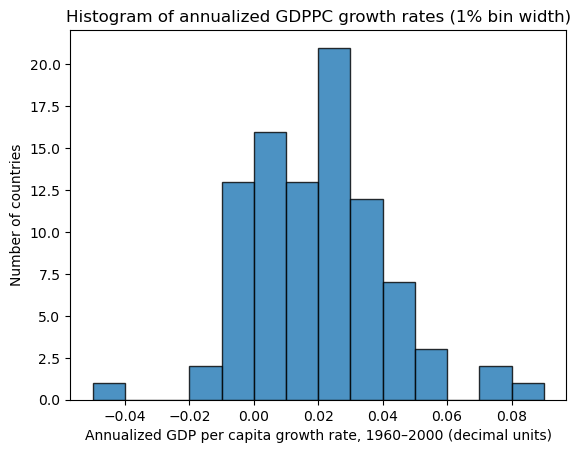

In [11]:

# We use the annualized growth rate variable "g_ann", which is in DECIMAL units:
#   ex: 0.02 = 2% annual growth.
#
# The assignment asks for bin widths of 1 percentage point (1%).
# Since 1% = 0.01 in decimal units, we set bin_width = 0.01.

bin_width = 0.01

# Determine min/max growth rates to build a bin sequence that covers the full range
gmin, gmax = d["g_ann"].min(), d["g_ann"].max()

# Create evenly spaced histogram bins with width = 0.01 (1 percentage point)
# We use floor/ceil so the first/last bin boundaries are round values.
bins = np.arange(
    np.floor(gmin / bin_width) * bin_width,
    np.ceil(gmax / bin_width) * bin_width + bin_width,
    bin_width
)

# Plot histogram
plt.figure()
plt.hist(
    d["g_ann"],
    bins=bins,
    edgecolor="black",   # outlines around each bar
    linewidth=1,         # thickness of outlines
    alpha=0.8            # slight transparency for readability
)

# Label axes clearly for the visualization
plt.xlabel("Annualized GDP per capita growth rate, 1960–2000 (decimal units)")
plt.ylabel("Number of countries")
plt.title("Histogram of annualized GDPPC growth rates (1% bin width)")

plt.show()

# Q2: Percentiles

In [16]:
percentiles = d["g_ann"].quantile([0.10, 0.25, 0.50, 0.75, 0.90])

# Convert from decimal to percent and round to 2 decimals (as instructed in the assignment)
(percentiles * 100).round(2)

0.10   -0.46
0.25    0.56
0.50    2.01
0.75    3.24
0.90    4.55
Name: g_ann, dtype: float64

### Distribution of Annualized GDP per Capita Growth Rates (1960–2000)

The table above reports selected percentiles of the annualized GDP per capita growth rate distribution across countries between 1960 and 2000.

The **10th percentile** of the growth rates is approximately **−0.46 percent**, indicating that the bottom decile of countries experienced declining GDP per capita over the period. The **25th percentile** is **0.56 percent**, suggesting that a substantial share of countries grew very slowly during these four decades.

The **50th percentile** annualized rate is approximately **2.01 percent**. The **75th percentile** is **3.24 percent**, while the **90th percentile** reaches **4.55 percent**, these reflect a subset of countries that achieved rapid long-run growth.


# Q3: GDPPC Highest and Lowest Rates

In [15]:
# Q3: Identify the 3 countries with the highest and lowest annualized growth
# Sort by g_ann" and take the top 3 and bottom 3.

top3 = (
    d.sort_values("g_ann", ascending=False)
     [[COUNTRY, "g_ann"]]
     .head(3)
     .assign(growth_pct=lambda x: (x["g_ann"] * 100).round(2))  # convert to percent units
)

bottom3 = (
    d.sort_values("g_ann", ascending=True)
     [[COUNTRY, "g_ann"]]
     .head(3)
     .assign(growth_pct=lambda x: (x["g_ann"] * 100).round(2))
)

# Display both tables
top3, bottom3

(    code  g_ann  growth_pct
 103  MLT   0.09        8.85
 24   BWA   0.08        7.98
 85   KOR   0.08        7.75,
     code  g_ann  growth_pct
 32   COD  -0.04       -4.16
 115  NGA  -0.02       -1.87
 114  NER  -0.02       -1.64)

### Highest and Lowest GDP per Capita Growth Rates (1960–2000)

The table above reports the **three countries with the highest** and **three countries with the lowest** annualized GDP per capita growth rates over the 1960–2000 period.

**Highest-growth countries (top three).**  
The top three performers in the sample are **Malta (MLT)**, **Botswana (BWA)**, and **South Korea (KOR)**. Malta experienced the fastest growth, with an average annual GDP per capita growth rate of approximately **8.85 percent**, followed closely by Botswana and South Korea at **7.98 percent per year** and **7.75 percent per year**. 

**Lowest-growth countries (bottom three).**  
The bottom three performers are **the Democratic Republic of the Congo (COD)**, **Nigeria (NGA)**, and **Niger (NER)**. The Democratic Republic of the Congo experienced the poorest performance, with an average annual GDP per capita growth rate of approximately **−4.16 percent**, while Nigeria and Niger recorded negative growth rates of roughly **−1.87 percent** and **−1.64 percent**, respectively.


# Q4: Plot countries’ growth rates against the 1960 (log) GDPPC.